In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters
%matplotlib inline

In [2]:
output = np.load('output.npy')
otsu = np.load('otsu.npy')
hysteresis = np.load('hysteresis.npy')
fill = np.load('fill.npy')

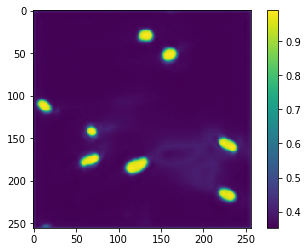

In [3]:
plt.imshow(output)
plt.colorbar()

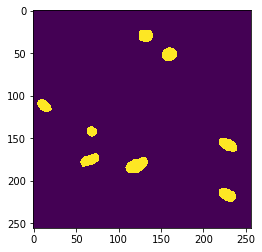

In [4]:
plt.imshow(otsu)

## Artificial editing

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


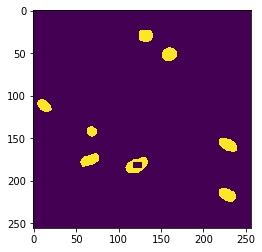

In [5]:
otsu_new = np.copy(otsu)
print(otsu_new[180:186, 125:128])
otsu_new[179:186, 117:128] = 0
plt.imshow(otsu_new)

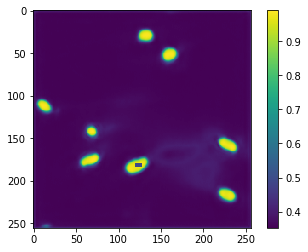

In [6]:
output_edit = np.copy(output)
output_edit[180:184, 120:128] = 0.5
plt.imshow(output_edit)
plt.colorbar()

0.6204158258624375


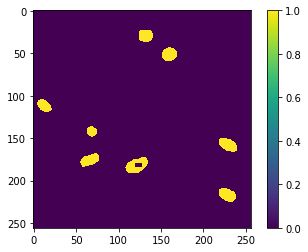

In [7]:
thresh = filters.threshold_otsu(output_edit)
print(thresh)
mask_otsu = np.where(output_edit > thresh, 1, 0)
plt.imshow(mask_otsu)
plt.colorbar()

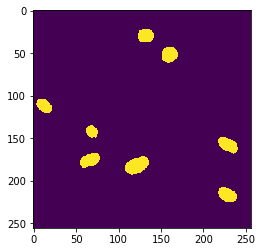

In [8]:
low_thresh = thresh - thresh/5
hyst_hole = filters.apply_hysteresis_threshold(output_edit, low_thresh, thresh)
plt.imshow(hyst_hole)

In [11]:
low_thresh_10 = thresh - thresh / 10
low_thresh_05 = thresh - thresh/5
hyst_mask_10 = filters.apply_hysteresis_threshold(output, low_thresh_10, thresh)
hyst_mask_05 = filters.apply_hysteresis_threshold(output, low_thresh_05, thresh)

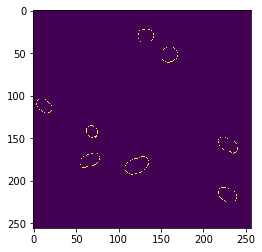

In [14]:
plt.imshow(np.abs(hyst_mask_10.astype(int) - hyst_mask_05.astype(int)))

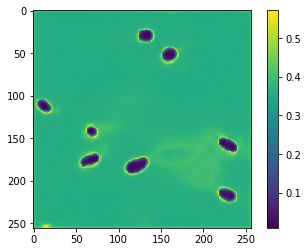

In [18]:
plt.imshow(np.abs(output - hyst_mask_10.astype(int)))
plt.colorbar()

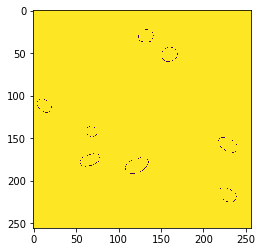

In [23]:
plt.imshow(otsu - hyst_mask_10.astype(int))